# Exploration_SSAC 01 
## 가위바위보 분류기 만들기

* 분류기 생성 과정
    * 데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)

* 정확도를 올리기 위한 방법  
1) 데이터 양 늘리기  
2) Data Augmentation (데이터를 변형)  
3) Layer structure  
4) HyperParameter 조정

##### 필요한 라이브러리 import

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
import os, glob

PIL 라이브러리 :  파이썬 인터프리터에 다양한 이미지 파일 형식을 지원하고 강력한 이미지 처리와 그래픽 기능을 제공하는 자유-오픈 소스 소프트웨어 라이브러리

In [2]:
!pip install pillow

##### Train 데이터 준비 - Data Load

* 직접 생성한 300장 + 팀원 데이터 2100장 + 구글 데이터 2520장 + 기타 팀원 데이터 600장
* 중복 파일명 수정 과정에서 일단 stop! (파이썬 문법이 약하니 겪게 되는 문제 ㅠㅠ)

In [3]:
# def changeName(path, cName):
#     i = 0
#     for filename in os.listdir(path):
#         print(path+filename, '=>', path+str(cName)+str(i)+'.jpg')
#         os.rename(path+filename, path+str(cName)+str(i)+'.jpg')
#         i += 1
 
# changeName('/home/ssac22/Downloads/rock_scissor_paper/paper','')

In [4]:
os.getcwd()

'/home/ssac22'

##### Train 데이터 준비 - 현승님 제공 Data Load
* 클래스별 1100장 총 3300장

In [5]:
# scissor 파일 안의 사진 크기 28X28 크기로 resize 진행 및 확인
image_dir_path = os.getenv("HOME") + "/aiffel/train_total/scissor"
print("이미지 디렉토리 경로:", image_dir_path)

images = glob.glob(image_dir_path+"/*.jpg")

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
    
print("Train Image Resize 완료")

이미지 디렉토리 경로: /home/ssac22/aiffel/train_total/scissor
Train Image Resize 완료


In [6]:
# rock 파일 안의 사진 크기 28X28 크기로 resize 진행 및 확인
image_dir_path = os.getenv("HOME") + "/aiffel/train_total/rock"
print("이미지 디렉토리 경로:", image_dir_path)

images = glob.glob(image_dir_path+"/*.jpg")

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
    
print("Train Image Resize 완료")

이미지 디렉토리 경로: /home/ssac22/aiffel/train_total/rock
Train Image Resize 완료


In [7]:
# paper 파일 안의 사진 크기 28X28 크기로 resize 진행 및 확인
image_dir_path = os.getenv("HOME") + "/aiffel/train_total/paper"
print("이미지 디렉토리 경로:", image_dir_path)

images = glob.glob(image_dir_path+"/*.jpg")

target_size=(28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")
    
print("Train Image Resize 완료")

이미지 디렉토리 경로: /home/ssac22/aiffel/train_total/paper
Train Image Resize 완료


In [8]:
# 데이터로드에 활용될 메서드 load_data 정의
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3300   # 가위바위보 이미지 개수 총 개수
    img_size=28 # 이미지 크기
    color=3 # 컬러 사진이기 때문에 RGB channel 3 :: 흑백일 때는 1
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0 # 초기값 설정
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
# 이미지 경로를 인자로 넣으면, 각 경로에 있는 이미지를 행렬 영역을 생성하고, 
# 각 항목에 맞는 label을 부여해 줘서 최종적으로 데이터 / 라벨로 return 해줌

# 정의내린 함수를 활용하여 데이터를 로드해 보자
image_dir_path = os.getenv("HOME") + "/aiffel/train_total" # 경로 체크 중요
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화 :: 값의 범위를 줄여 분포를 좁게 만들면 정확도도 올라갈 것이다

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3300 입니다.
x_train shape: (3300, 28, 28, 3)
y_train shape: (3300,)


In [9]:
len(x_train_norm)

3300

In [10]:
len(x_train_norm[0])

28

**Error Check**  

* **could not broadcast input array from shape (224,224,3) into shape (28,28,3)**    
데이터 로드 과정에서 만났던 error인데, 처음에는 어떤 의미인지 감을 못 잡아 오래 헤맸는데,  
input shape 에 데이터를 넣는 과정에서 문제가 생겼다고 판단하여,  
다시 한번 데이터 로드 과정 전에 가위, 바위, 보의 각 파일에 속한 이미지들이 resize되었는지 확인해 보니 안 된 부분이 있었다..!   
다시 resize하여 사이즈를 맞춰줬더니 정상적으로 동작!  


* broadcast 관련 error를 마주친다면,  
설정해 준 input size, input shape과 data_load 과정에서 직접 input 되는 데이터들의 규격이 맞는지 다시 한번 더 확인하자!

In [11]:
print(image_dir_path) # 자꾸 오류가 떠서 경로 문제일까 싶어 확인

/home/ssac22/aiffel/train_total


라벨:  0


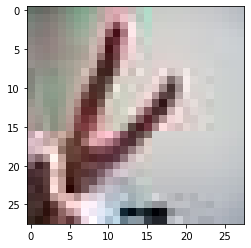

In [12]:
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

##### 딥러닝 네트워크 설계

In [29]:
n_channel_1=64
n_channel_2=64
n_channel_3=128
n_channel_4=64
n_dense=16

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Conv2D(n_channel_4, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)             

* Error Check  
Negative dimension size caused by subtracting 3 from 1 for 'conv2d_1/convolution' (op: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_6/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_5/Identity, conv2d_6/Conv2D/ReadVariableOp)' with input shapes: [?,1,1,128], [3,3,128,256].


초반에 깊은 고민없이, Layer와 Conv2D, MaxPooling을 추가하였더니,  
Conv2D 연산이 되지 않는 수치에 도달했던 것 같다.  

그래서 해당 레이어를 삭제하고 진행하였더니 오류는 없어졌다.  
(이는, CNN Network에서 Convolutional 연산과 Maxpooling의 개념과 과정을 정확히 알고 있다면 일어나지 않을 실수일 것이다)

In [14]:
len(x_train_norm)

3300

##### 데이터 학습

In [33]:
n_train_epoch=20

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
104/104 [==============================] - 1s 10ms/step - loss: 0.1121 - accuracy: 0.9594
Epoch 2/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0858 - accuracy: 0.9694
Epoch 3/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0946 - accuracy: 0.9624
Epoch 4/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0808 - accuracy: 0.9694
Epoch 5/20
104/104 [==============================] - 1s 12ms/step - loss: 0.0578 - accuracy: 0.9794
Epoch 6/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0551 - accuracy: 0.9818
Epoch 7/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0669 - accuracy: 0.9755
Epoch 8/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0610 - accuracy: 0.9797
Epoch 9/20
104/104 [==============================] - 1s 10ms/step - loss: 0.0623 - accuracy: 0.9800
Epoch 10/20
104/104 [==============================] - 1s 11ms/step - loss: 0.0945 - accura

##### Test Data 생성 

In [34]:
import os

# Data Load를 위한 사전 준비
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rps_test/paper" # 경로 주의
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.png") # 사용한 구글 이미지 데이터 확장자!! check!
target_size=(28,28) # resize check

for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(img,"png")
print("보 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rps_test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.png")  
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(img,"png")
print("주먹 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rps_test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)
images=glob.glob(image_dir_path + "/*.png")  
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img=new_img.convert('RGB')
    new_img.save(img,"png")
print("가위 이미지 resize 완료!")
print(new_img.size)


# load_data 함수 정의
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2520   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# 실질적 load_data
image_dir_path = os.getenv("HOME") + "/aiffel/rps_test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

이미지 디렉토리 경로:  /home/ssac22/aiffel/rps_test/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac22/aiffel/rps_test/rock
주먹 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac22/aiffel/rps_test/scissor
가위 이미지 resize 완료!
(28, 28)
테스트데이터(x_test)의 이미지 개수는 2520 입니다.
x_test shape: (2520, 28, 28, 3)
y_test shape: (2520,)


##### 테스트 데이터를 활용하여 준비된 딥러닝 네트워크 학습 및 평가

In [35]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

79/79 - 0s - loss: 1.8218 - accuracy: 0.7067
test_loss: 1.8218151330947876 
test_accuracy: 0.7067460417747498


### Result of project

1) teachable 사이트를 활용하여 빠르게 데이터를 직접 촬영하고 저장할 수 있음  
2) 직접 촬영한 데이터 300개를 가지고 학습시키고 다른 데이터를 활용하여 test했을 때, 30% 남짓한 정확도를 얻음  
3) 1단계로 데이터 부족이 큰 요소라 생각하여, 동료들의 데이터를 모았고, (파일명이 겹치는 문제를 해결하지 못해, 다른 데이터 사용)  
4) 기존의 224 * 224 크기의 이미지를 28 * 28 사이즈로 줄여주고, (input size 조절)  
5) load_data 함수를 정의하여, 각 경로에 맞는 데이터를 로드 완료  
6) keras를 활용한 Deep Learning Network를 만들었고,  
7) 준비된 데이터로 학습을 시킨 다음  
8) test용 데이터를 따로 준비하여 전처리 및 정규화 진행  
9) 만들어 놓은 모델을 사용하여 test!  
10) 학습하고 평가하여 최종 정확도 70% 도달

### Opinion

파이썬 문법 및 데이터 크롤링을 통하여 더 많은 사전 데이터를 수집하고, 전처리를 진행하였으면 정확도가 더 개선되지 않았을까 싶다.  
또한, 네트워크 구조 이해를 통해 더 정밀한 네트워크를 설계하는 것이 중요했고,  
데이터를 추가적으로 수집하는 Offline Data Augmentation이 아닌, 랜덤으로 변형하여 들어가는 Online Data Augmentation을 적용해 보면 더 개선될 것 같다.  

마지막으로, 기억해 두어야 할 부분은 **데이터 수집 -> 데이터 전처리 -> 네트워크 설계 -> 학습 -> 평가** 의 Process를 잊지 말자!